In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

In [3]:
dfbit=pd.read_json('https://api.coindesk.com/v1/bpi/historical/close.json?start=2013-09-01&end='+str(date.today())).iloc[:-2]
dfbit=dfbit.reset_index()
dfbit.columns=['Date', 'bpi', 'disclaimer', 'time']
dfbit=dfbit.set_index('Date')
dfbit=dfbit[['bpi']]
dfbit.tail()

,bpi
Date,
2020-11-12,16301.0267
2020-11-13,16330.3433
2020-11-14,16075.7133
2020-11-15,15968.2450
2020-11-16,16720.6050


In [4]:
dfbitchange=dfbit
dfbitchange['logbpi']=np.log(dfbitchange['bpi'])

dfbitchange['percent_daily']=dfbitchange['bpi'].pct_change(periods=1)
dfbitchange['percent_daily_log']=np.log(dfbitchange['bpi']).pct_change(periods=1)
dfbitchange['daily_diff']=dfbitchange['bpi'].diff(1)
dfbitchange['daily_log_diff']=np.log(dfbitchange['bpi']).diff(1)

dfbitchange['percent_weekly']=dfbitchange['bpi'].pct_change(periods=7)
dfbitchange['percent_weekly_log']=np.log(dfbitchange['bpi']).pct_change(periods=7)
dfbitchange['weekly_diff']=dfbitchange['bpi'].diff(7)
dfbitchange['weekly_log_diff']=np.log(dfbitchange['bpi']).diff(7)


dfbitchange['percent_bimonthly']=dfbitchange['bpi'].pct_change(periods=14)
dfbitchange['percent_bimonthly_log']=np.log(dfbitchange['bpi']).pct_change(periods=14)
dfbitchange['bimonthly_diff']=dfbitchange['bpi'].diff(14)
dfbitchange['bimonthly_log_diff']=np.log(dfbitchange['bpi']).diff(14)

dfbitchange['percent_30Days']=dfbitchange['bpi'].pct_change(periods=30)
dfbitchange['percent_30Days_log']=np.log(dfbitchange['bpi']).pct_change(periods=30)
dfbitchange['30Days_diff']=dfbitchange['bpi'].diff(30)
dfbitchange['30Days_log_diff']=np.log(dfbitchange['bpi']).diff(30)

dfbitchange['percent_60Days']=dfbitchange['bpi'].pct_change(periods=60)
dfbitchange['percent_60Days_log']=np.log(dfbitchange['bpi']).pct_change(periods=60)
dfbitchange['60Days_diff']=dfbitchange['bpi'].diff(60)
dfbitchange['60Days_log_diff']=np.log(dfbitchange['bpi']).diff(60)

dfbitchange['percent_90Days']=dfbitchange['bpi'].pct_change(periods=90)
dfbitchange['percent_90Days_log']=np.log(dfbitchange['bpi']).pct_change(periods=90)
dfbitchange['90Days_diff']=dfbitchange['bpi'].diff(90)
dfbitchange['90Days_log_diff']=np.log(dfbitchange['bpi']).diff(90)

In [5]:
dfbitchange.head()

,bpi,logbpi,percent_daily,percent_daily_log,daily_diff,daily_log_diff,percent_weekly,percent_weekly_log,weekly_diff,weekly_log_diff,...,30Days_diff,30Days_log_diff,percent_60Days,percent_60Days_log,60Days_diff,60Days_log_diff,percent_90Days,percent_90Days_log,90Days_diff,90Days_log_diff
Date,,,,,,,,,,,,,,,,,,,,,
2013-09-01,128.2597,4.854057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-02,127.3648,4.847055,-0.006977,-0.001442,-0.8949,-0.007002,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-03,127.5915,4.848834,0.001780,0.000367,0.2267,0.001778,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-04,120.5738,4.792262,-0.055001,-0.011667,-7.0177,-0.056572,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-05,120.5333,4.791926,-0.000336,-0.000070,-0.0405,-0.000336,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Question: Is this bitcoin bull market just a repeat of the 2017 bubble?

## Answer: Maybe Not!

#### Over the last 90 days bitcoin has broken away on the upside of its 7, 14 and 21 day moving averages

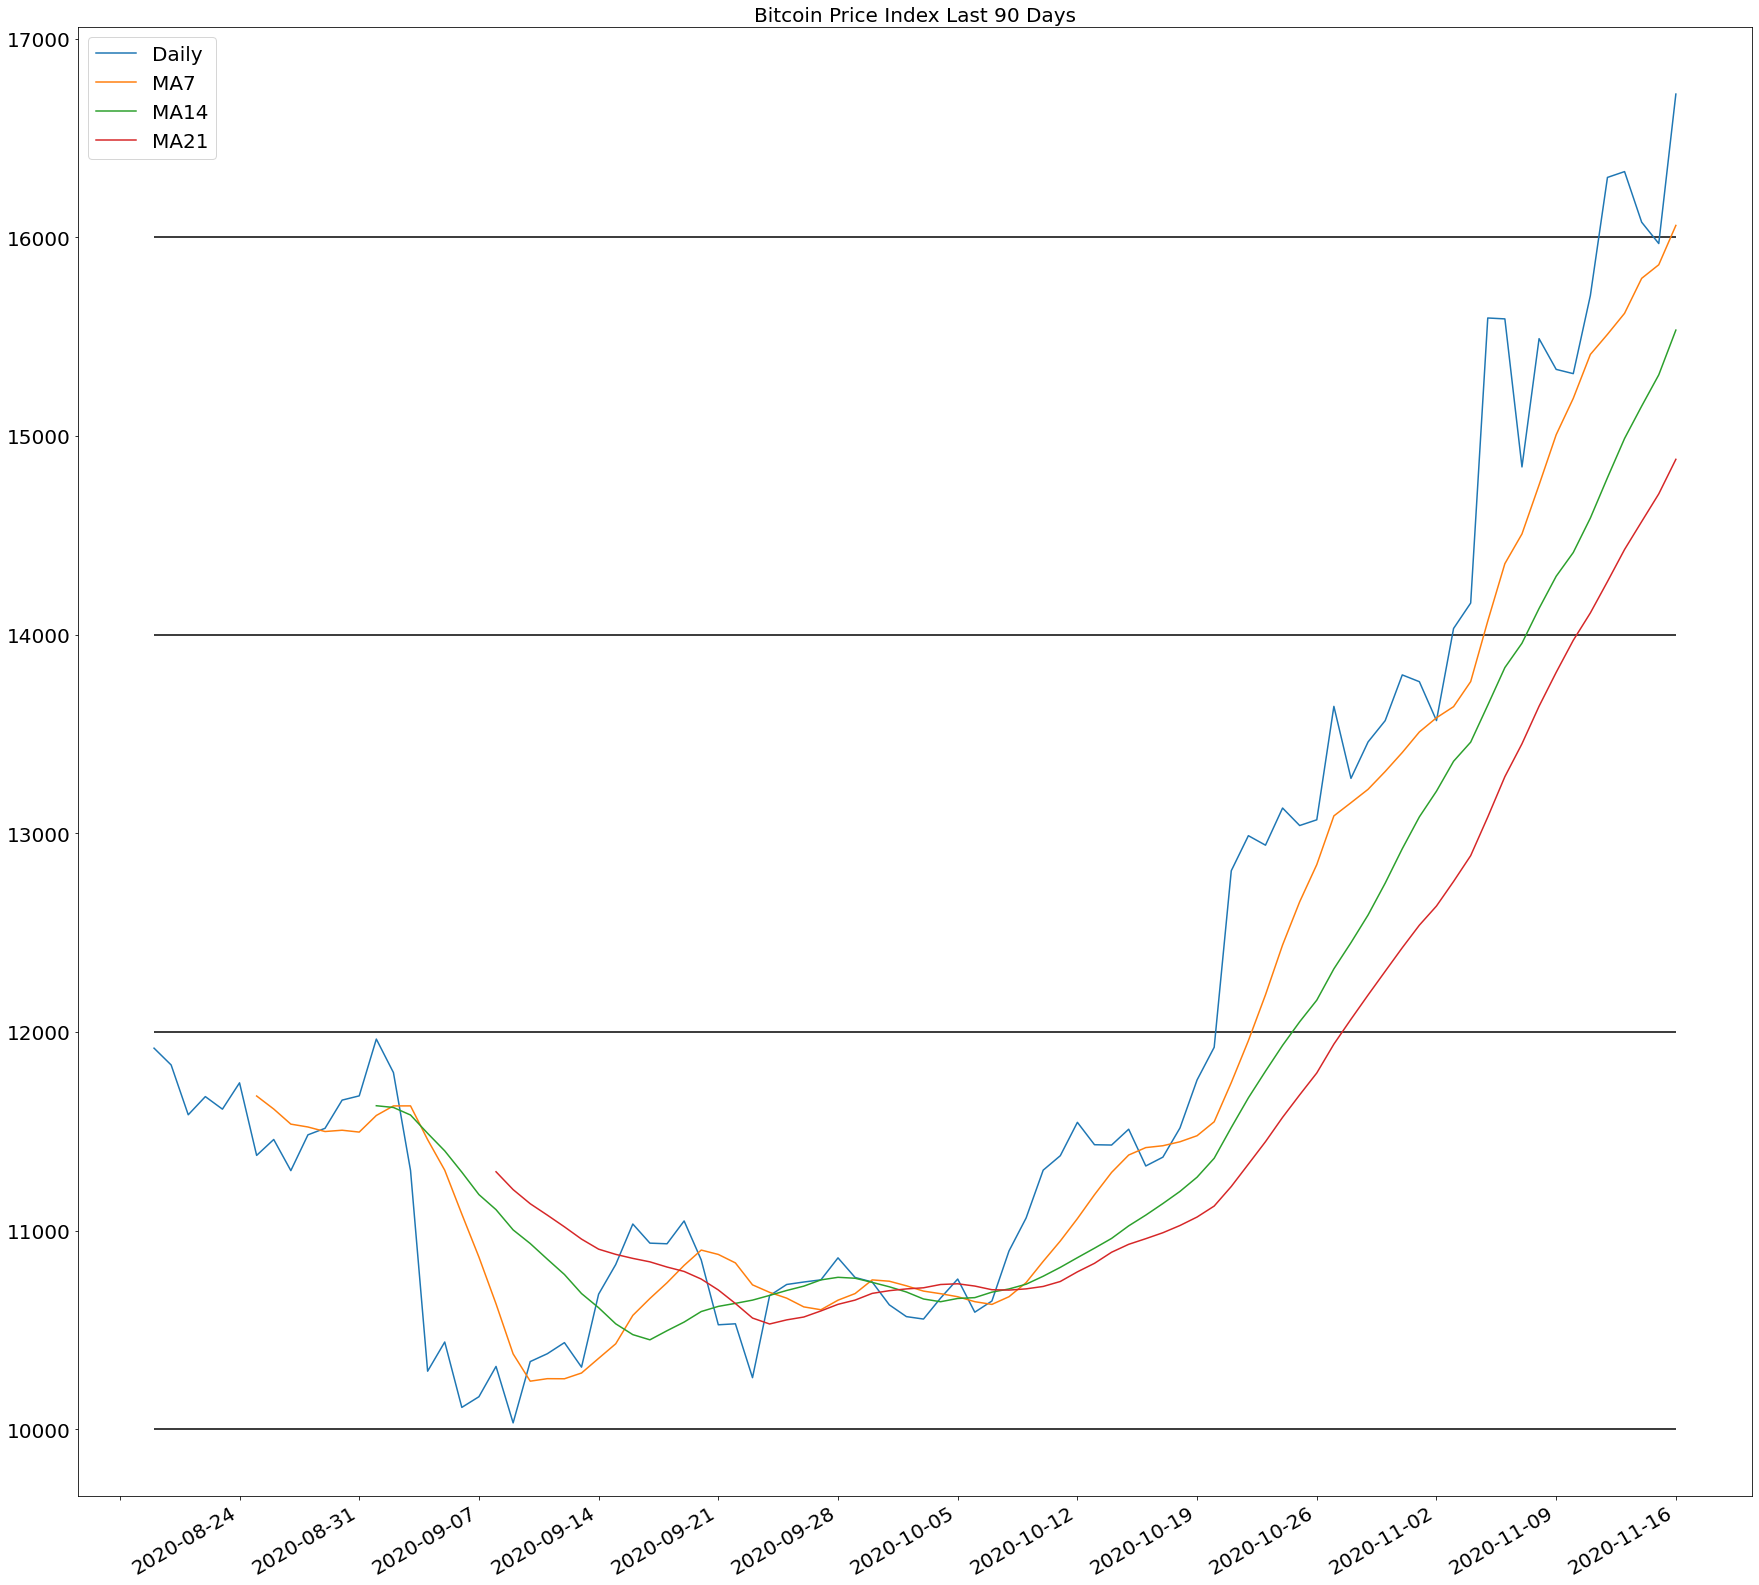

In [6]:
#Weekly moving average plot
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
plt.rcParams['figure.figsize'] = [30, 30]
fig, ax = plt.subplots()
ax.plot(dfbit['bpi'].tail(90).index,dfbit['bpi'].tail(90).values,label='Daily')
ax.plot(dfbit['bpi'].tail(90).index,dfbit['bpi'].tail(90).rolling(7).mean().values,label='MA7')
ax.plot(dfbit['bpi'].tail(90).index,dfbit['bpi'].tail(90).rolling(14).mean().values,label='MA14')
ax.plot(dfbit['bpi'].tail(90).index,dfbit['bpi'].tail(90).rolling(21).mean().values,label='MA21')
ax.hlines(10000,dfbit['bpi'].tail(90).index[0],dfbit['bpi'].tail(90).index[-1],color='k')
ax.hlines(12000,dfbit['bpi'].tail(90).index[0],dfbit['bpi'].tail(90).index[-1],color='k')
ax.hlines(14000,dfbit['bpi'].tail(90).index[0],dfbit['bpi'].tail(90).index[-1],color='k')
ax.hlines(16000,dfbit['bpi'].tail(90).index[0],dfbit['bpi'].tail(90).index[-1],color='k')
plt.legend(loc="upper left")
plt.legend(fontsize=20) 
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.title('Bitcoin Price Index Last 90 Days',fontsize=20)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
fig.autofmt_xdate()
plt.show()


#### Is this growth sustainable or are we heading for another bubble like in 2017?

#### Lets look at the historical price action to see.

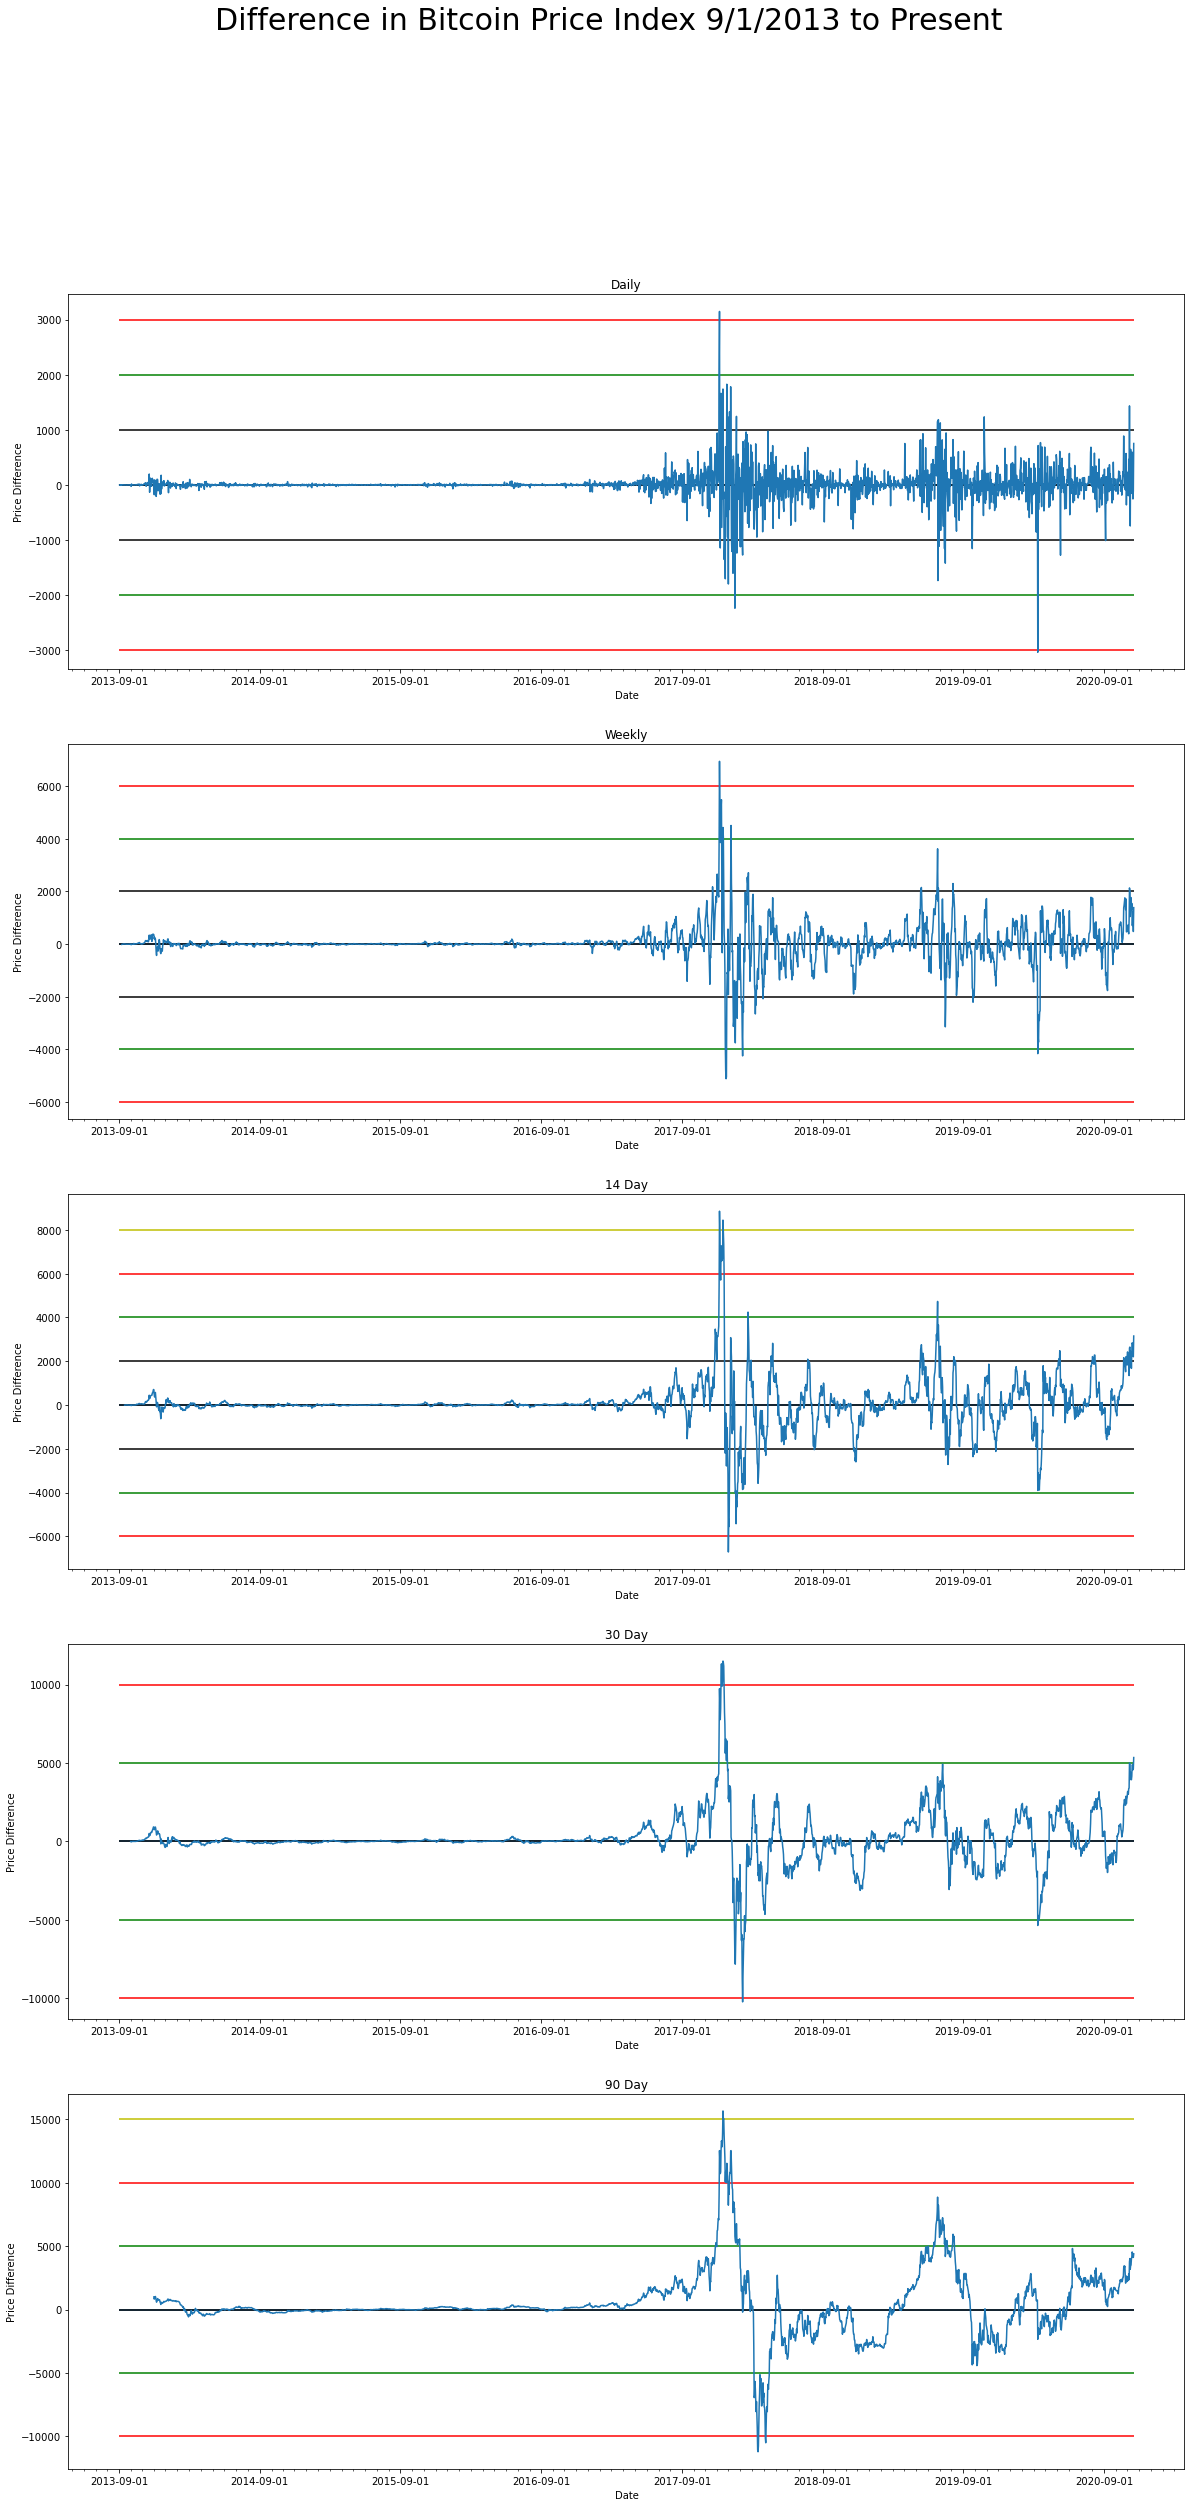

In [7]:
rangecrash=dfbitchange['daily_diff'].loc[:].index
valuescrash=dfbitchange['daily_diff'].loc[:].values
plt.rcParams['figure.figsize'] = [20, 40]
fig,axs=plt.subplots(5)
fig.suptitle('Difference in Bitcoin Price Index 9/1/2013 to Present',fontsize=30)
axs[0].plot(rangecrash,valuescrash)
axs[0].hlines(0,rangecrash[0],rangecrash[-1])
axs[0].xaxis.set_major_locator(mdates.YearLocator())
axs[0].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[0].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(1000,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(2000,rangecrash[0],rangecrash[-1],color='g')
axs[0].hlines(3000,rangecrash[0],rangecrash[-1],color='r')
axs[0].hlines(-1000,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(-2000,rangecrash[0],rangecrash[-1],color='g')
axs[0].hlines(-3000,rangecrash[0],rangecrash[-1],color='r')
axs[0].title.set_text('Daily')
axs[0].set_ylabel('Price Difference')
axs[0].set_xlabel('Date')

rangecrash=dfbitchange['weekly_diff'].loc[:].index
valuescrash=dfbitchange['weekly_diff'].loc[:].values
axs[1].plot(rangecrash,valuescrash)
axs[1].hlines(0,rangecrash[0],rangecrash[-1])
axs[1].xaxis.set_major_locator(mdates.YearLocator())
axs[1].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[1].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[1].hlines(2000,rangecrash[0],rangecrash[-1],color='k')
axs[1].hlines(4000,rangecrash[0],rangecrash[-1],color='g')
axs[1].hlines(6000,rangecrash[0],rangecrash[-1],color='r')
axs[1].hlines(-2000,rangecrash[0],rangecrash[-1],color='k')
axs[1].hlines(-4000,rangecrash[0],rangecrash[-1],color='g')
axs[1].hlines(-6000,rangecrash[0],rangecrash[-1],color='r')
axs[1].title.set_text('Weekly')
axs[1].set_ylabel('Price Difference')
axs[1].set_xlabel('Date')

rangecrash=dfbitchange['bimonthly_diff'].loc[:].index
valuescrash=dfbitchange['bimonthly_diff'].loc[:].values
axs[2].plot(rangecrash,valuescrash)
axs[2].hlines(0,rangecrash[0],rangecrash[-1])
axs[2].xaxis.set_major_locator(mdates.YearLocator())
axs[2].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[2].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[2].hlines(2000,rangecrash[0],rangecrash[-1],color='k')
axs[2].hlines(4000,rangecrash[0],rangecrash[-1],color='g')
axs[2].hlines(6000,rangecrash[0],rangecrash[-1],color='r')
axs[2].hlines(8000,rangecrash[0],rangecrash[-1],color='y')
axs[2].hlines(-2000,rangecrash[0],rangecrash[-1],color='k')
axs[2].hlines(-4000,rangecrash[0],rangecrash[-1],color='g')
axs[2].hlines(-6000,rangecrash[0],rangecrash[-1],color='r')
axs[2].title.set_text('14 Day')
axs[2].set_ylabel('Price Difference')
axs[2].set_xlabel('Date')

rangecrash=dfbitchange['30Days_diff'].loc[:].index
valuescrash=dfbitchange['30Days_diff'].loc[:].values
axs[3].plot(rangecrash,valuescrash)
axs[3].hlines(0,rangecrash[0],rangecrash[-1])
axs[3].xaxis.set_major_locator(mdates.YearLocator())
axs[3].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[3].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[3].hlines(5000,rangecrash[0],rangecrash[-1],color='g')
axs[3].hlines(10000,rangecrash[0],rangecrash[-1],color='r')
axs[3].hlines(-5000,rangecrash[0],rangecrash[-1],color='g')
axs[3].hlines(-10000,rangecrash[0],rangecrash[-1],color='r')
axs[3].title.set_text('30 Day')
axs[3].set_ylabel('Price Difference')
axs[3].set_xlabel('Date')

rangecrash=dfbitchange['90Days_diff'].loc[:].index
valuescrash=dfbitchange['90Days_diff'].loc[:].values
axs[4].plot(rangecrash,valuescrash)
axs[4].hlines(0,rangecrash[0],rangecrash[-1])
axs[4].xaxis.set_major_locator(mdates.YearLocator())
axs[4].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[4].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[4].hlines(5000,rangecrash[0],rangecrash[-1],color='g')
axs[4].hlines(10000,rangecrash[0],rangecrash[-1],color='r')
axs[4].hlines(15000,rangecrash[0],rangecrash[-1],color='y')
axs[4].hlines(-5000,rangecrash[0],rangecrash[-1],color='g')
axs[4].hlines(-10000,rangecrash[0],rangecrash[-1],color='r')
axs[4].title.set_text('90 Day')
axs[4].set_ylabel('Price Difference')
axs[4].set_xlabel('Date')

plt.show()

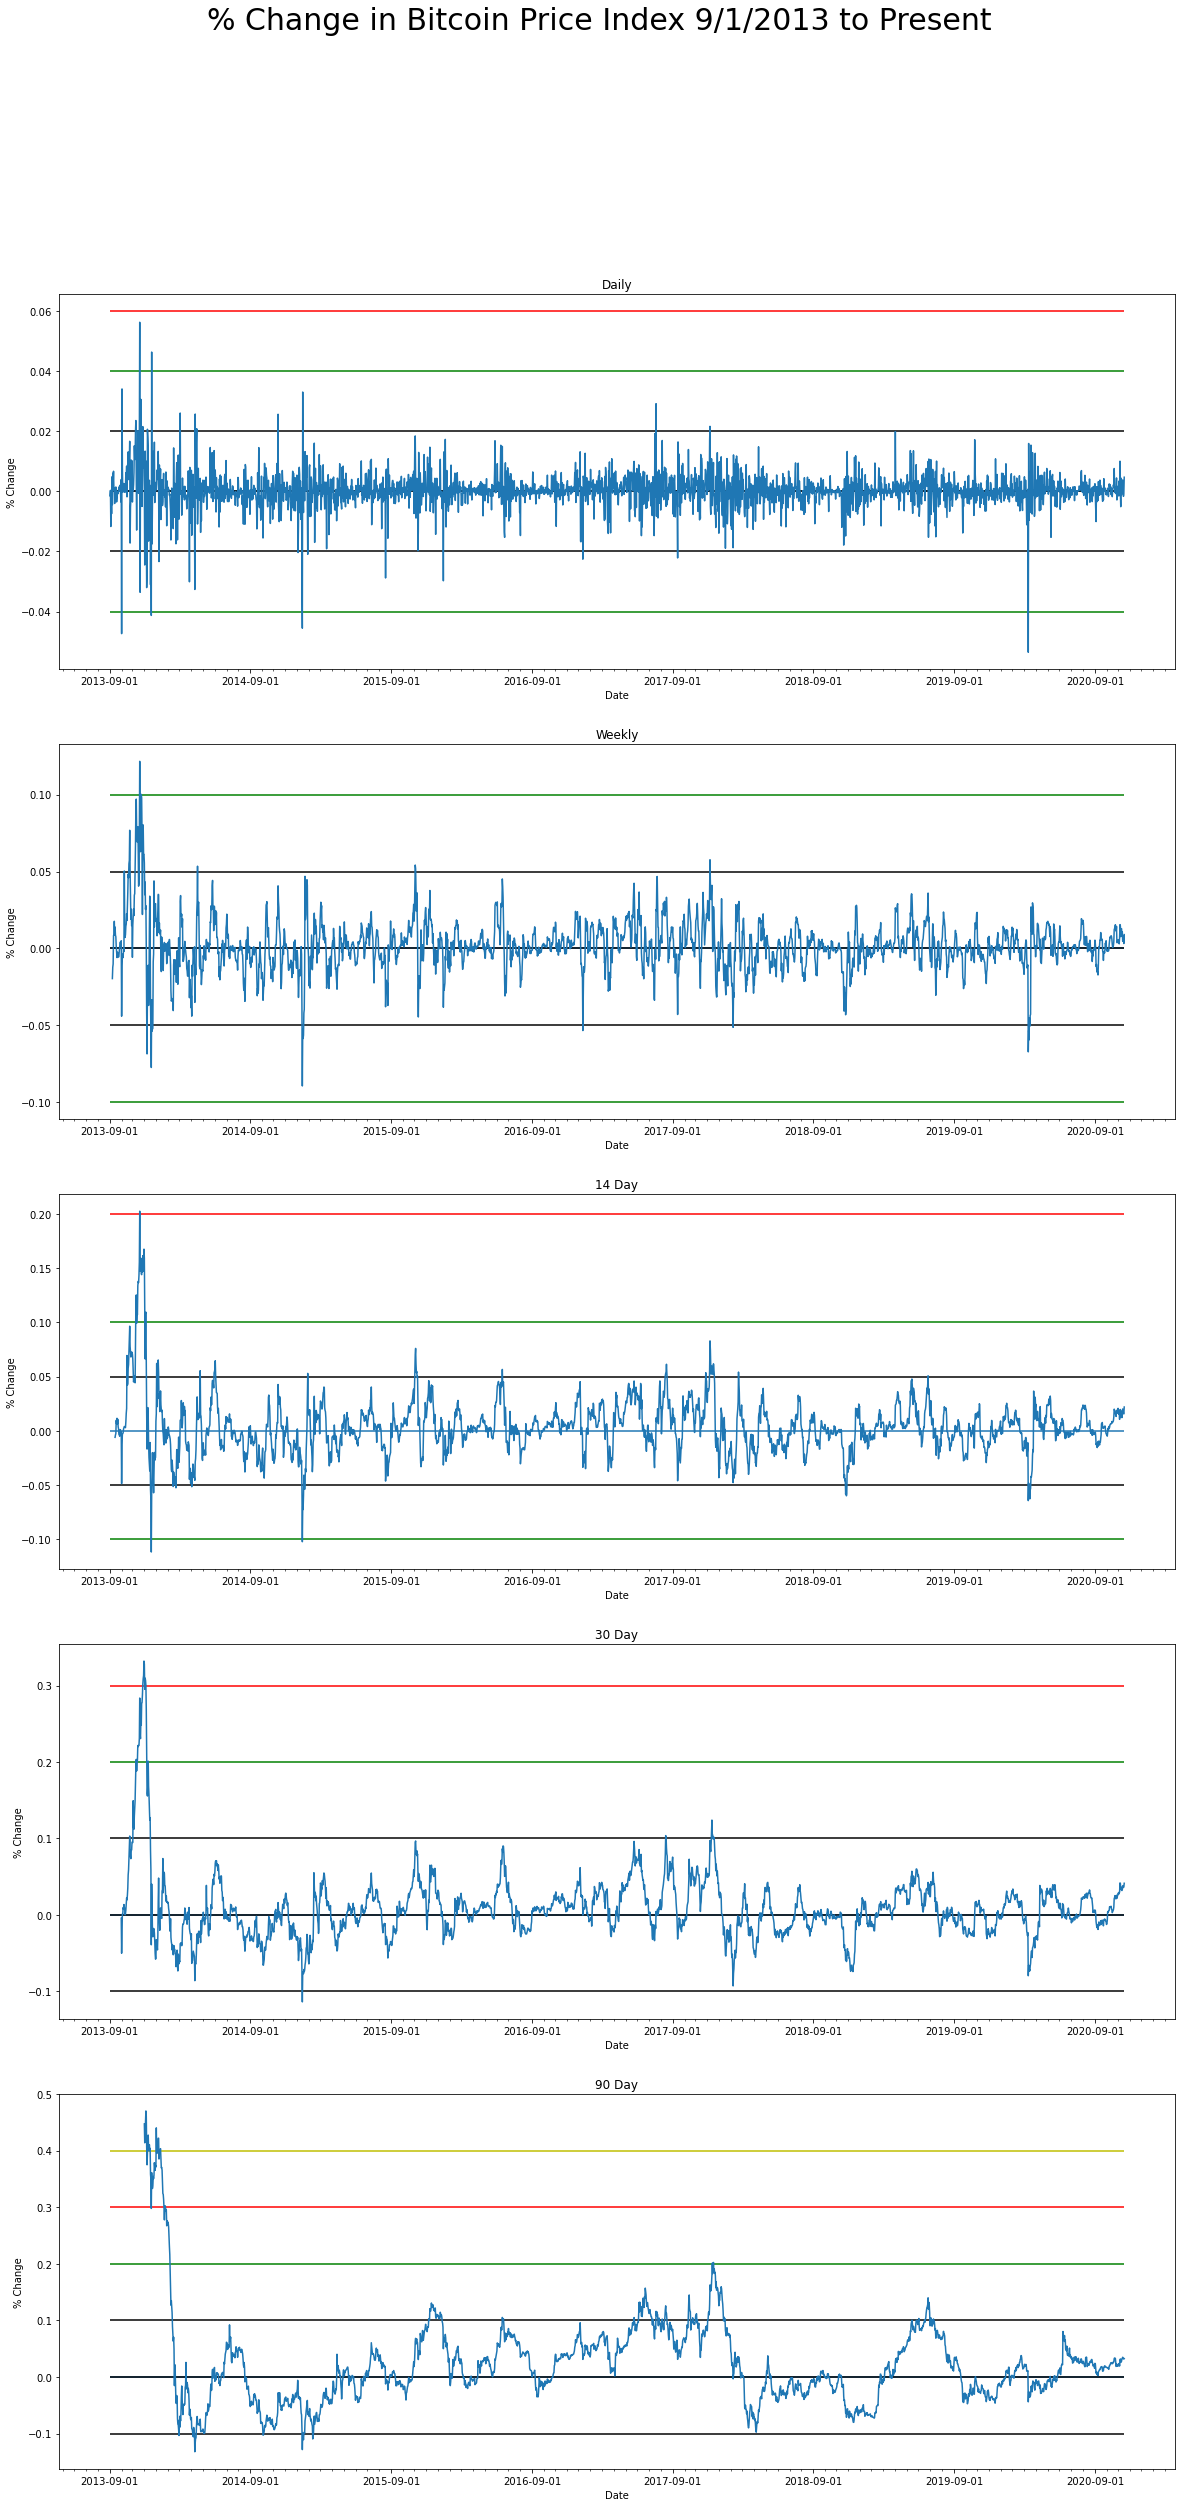

In [8]:
rangecrash=dfbitchange['percent_daily_log'].loc[:].index
valuescrash=dfbitchange['percent_daily_log'].loc[:].values
plt.rcParams['figure.figsize'] = [20, 40]
fig,axs=plt.subplots(5)
fig.suptitle('% Change in Bitcoin Price Index 9/1/2013 to Present',fontsize=30)
axs[0].plot(rangecrash,valuescrash)
axs[0].hlines(0,rangecrash[0],rangecrash[-1])
axs[0].xaxis.set_major_locator(mdates.YearLocator())
axs[0].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[0].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(.02,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(.04,rangecrash[0],rangecrash[-1],color='g')
axs[0].hlines(.06,rangecrash[0],rangecrash[-1],color='r')
axs[0].hlines(-.02,rangecrash[0],rangecrash[-1],color='k')
axs[0].hlines(-.04,rangecrash[0],rangecrash[-1],color='g')
axs[0].title.set_text('Daily')
axs[0].set_ylabel('% Change')
axs[0].set_xlabel('Date')

rangecrash=dfbitchange['percent_weekly_log'].loc[:].index
valuescrash=dfbitchange['percent_weekly_log'].loc[:].values
axs[1].plot(rangecrash,valuescrash)
axs[1].hlines(0,rangecrash[0],rangecrash[-1])
axs[1].xaxis.set_major_locator(mdates.YearLocator())
axs[1].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[1].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[1].hlines(.05,rangecrash[0],rangecrash[-1],color='k')
axs[1].hlines(.1,rangecrash[0],rangecrash[-1],color='g')
axs[1].hlines(-.05,rangecrash[0],rangecrash[-1],color='k')
axs[1].hlines(-.1,rangecrash[0],rangecrash[-1],color='g')
axs[1].title.set_text('Weekly')
axs[1].set_ylabel('% Change')
axs[1].set_xlabel('Date')

rangecrash=dfbitchange['percent_bimonthly_log'].loc[:].index
valuescrash=dfbitchange['percent_bimonthly_log'].loc[:].values
axs[2].plot(rangecrash,valuescrash)
axs[2].hlines(0,rangecrash[0],rangecrash[-1])
axs[2].xaxis.set_major_locator(mdates.YearLocator())
axs[2].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[2].hlines(.05,rangecrash[0],rangecrash[-1],color='k')
axs[2].hlines(.1,rangecrash[0],rangecrash[-1],color='g')
axs[2].hlines(.2,rangecrash[0],rangecrash[-1],color='r')
axs[2].hlines(-.05,rangecrash[0],rangecrash[-1],color='k')
axs[2].hlines(-.1,rangecrash[0],rangecrash[-1],color='g')
axs[2].title.set_text('14 Day')
axs[2].set_ylabel('% Change')
axs[2].set_xlabel('Date')

rangecrash=dfbitchange['percent_30Days_log'].loc[:].index
valuescrash=dfbitchange['percent_30Days_log'].loc[:].values
axs[3].plot(rangecrash,valuescrash)
axs[3].hlines(0,rangecrash[0],rangecrash[-1])
axs[3].xaxis.set_major_locator(mdates.YearLocator())
axs[3].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[3].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[3].hlines(.1,rangecrash[0],rangecrash[-1],color='k')
axs[3].hlines(.2,rangecrash[0],rangecrash[-1],color='g')
axs[3].hlines(.3,rangecrash[0],rangecrash[-1],color='r')
axs[3].hlines(-.1,rangecrash[0],rangecrash[-1],color='k')
axs[3].title.set_text('30 Day')
axs[3].set_ylabel('% Change')
axs[3].set_xlabel('Date')

rangecrash=dfbitchange['percent_90Days_log'].loc[:].index
valuescrash=dfbitchange['percent_90Days_log'].loc[:].values
axs[4].plot(rangecrash,valuescrash)
axs[4].hlines(0,rangecrash[0],rangecrash[-1])
axs[4].xaxis.set_major_locator(mdates.YearLocator())
axs[4].xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
axs[4].hlines(0,rangecrash[0],rangecrash[-1],color='k')
axs[4].hlines(.1,rangecrash[0],rangecrash[-1],color='k')
axs[4].hlines(.2,rangecrash[0],rangecrash[-1],color='g')
axs[4].hlines(.3,rangecrash[0],rangecrash[-1],color='r')
axs[4].hlines(.4,rangecrash[0],rangecrash[-1],color='y')
axs[4].hlines(-.1,rangecrash[0],rangecrash[-1],color='k')
axs[4].title.set_text('90 Day')
axs[4].set_ylabel('% Change')
axs[4].set_xlabel('Date')

plt.show()
